# HEAPO: Usage Examples
This notebook provides examples on how to use the dataset and related dataloader.

### Imports
**Note:** Before running the script, ensure that `data_path` is set to the correct location of the stored data.

In [1]:
# ----------------------
# IMPORT OTHER PACKAGES 
# ----------------------
import os 
import sys
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
plt.rcParams["font.family"] = "sans-serif"

# ----------------------
# IMPORT HEAPO SCRIPTS
# ----------------------

# either run script heapo.py inside the src folder
# folder_path = os.path.dirname(os.getcwd())+'/src/'
# %run -i {folder_path + 'heapo.py'}

# or import heapo as a package - RECOMMENDED because Visual Studio Code then recognizes the package
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(0, folder_path)
sys.path.insert(0, folder_path + '/heapo/src')
from heapo import *

# ---------------------------------------
# DEFINE PATH TO WHERE THE DATA IS STORED
# ---------------------------------------

# NOTE: if data is stored under /data/ within this repository --> set data_path = None 
data_path = None

# otherwise please provide the absolute path to the HEAPO dataset including the last slash
# data_path = '/Users/user/path/to/heapo_data/'

# ---------------------------------------
# CREATE HEAPO OBJECT
# ---------------------------------------

# create HEAPO object
heapo = HEAPO(data_path=data_path, use_local_time=False, suppress_warning=False)

### Example: Print Statistics

In [2]:
# ---------------------------------------
print('*'*80+'\nGeneral Overview - Households Overview\n'+'*'*80)
df_meta = heapo.get_meta_data_overview()
print('Households - Total: {}'.format(len(df_meta)))
print('Household - Treatment: {}'.format(len(df_meta[df_meta['Group'] == 'treatment'])))
print('Households - Treatment [Double Visits]: {}'.format(len(df_meta[df_meta['Protocols_HasMultipleVisits']])))
print('Household - Control: {}'.format(len(df_meta[df_meta['Group'] == 'control'])))
print('Weather Stations: {}'.format(len(df_meta['Weather_ID'].unique())))
print('Number of protocols: {}'.format(len(heapo.get_all_protocols())))

# ---------------------------------------
print('\n'+'*'*80+'\nGeneral Overview - Smart Meter Data\n'+'*'*80)
df_overview = heapo.get_smart_meter_data_overview()
print('Measurement Period - 15min: {} to {}'.format(df_overview['SMD_15min_TimeAvailable_EarliestTimestamp'].min().date(), df_overview['SMD_15min_TimeAvailable_LatestTimestamp'].max().date()))
print('Measurement Period - daily: {} to {}'.format(df_overview['SMD_daily_TimeAvailable_EarliestTimestamp'].min().date(), df_overview['SMD_daily_TimeAvailable_LatestTimestamp'].max().date()))

# ---------------------------------------
df_treatment = df_overview.copy()
df_treatment = df_treatment[df_treatment['Household_ID'].isin(heapo.get_all_households_with_protocols())]
cols = ['Household_ID', 
 'SMD_15min_TimeAvailable_NumberDays', 
 'SMD_15min_TimeAvailable_DaysBeforeVisit', 
 'SMD_15min_TimeAvailable_DaysAfterVisit', 
 'SMD_daily_TimeAvailable_NumberDays', 
 'SMD_daily_TimeAvailable_DaysBeforeVisit', 
 'SMD_daily_TimeAvailable_DaysAfterVisit']
df_treatment = df_treatment[cols]
print('\n'+'*'*80)
print('Treatment Group Overview - 15min Smart Meter Data\n'+'*'*80)
print('Number of treatment household with before and after data: {}'.format(len(df_treatment[(df_treatment['SMD_15min_TimeAvailable_DaysBeforeVisit'] > 0) & (df_treatment['SMD_15min_TimeAvailable_DaysAfterVisit'] > 0)])))
print('Number of treatment households with before and without after data: {}'.format(len(df_treatment[(df_treatment['SMD_15min_TimeAvailable_DaysBeforeVisit'] > 0) & ((df_treatment['SMD_15min_TimeAvailable_DaysAfterVisit'] == 0) | (df_treatment['SMD_15min_TimeAvailable_DaysAfterVisit'].isna()))])))
print('Number of treatment households without before and with after data: {}'.format(len(df_treatment[((df_treatment['SMD_15min_TimeAvailable_DaysBeforeVisit'] == 0) | (df_treatment['SMD_15min_TimeAvailable_DaysBeforeVisit'].isna())) & (df_treatment['SMD_15min_TimeAvailable_DaysAfterVisit'] > 0)])))

print('\n'+'*'*80)
print('Treatment Group Overview - Daily Smart Meter Data\n'+'*'*80)
print('Number of treatment household with before and after data: {}'.format(len(df_treatment[(df_treatment['SMD_daily_TimeAvailable_DaysBeforeVisit'] > 0) & (df_treatment['SMD_daily_TimeAvailable_DaysAfterVisit'] > 0)])))
print('Number of treatment households with before and without after data: {}'.format(len(df_treatment[(df_treatment['SMD_daily_TimeAvailable_DaysBeforeVisit'] > 0) & ((df_treatment['SMD_daily_TimeAvailable_DaysAfterVisit'] == 0) | (df_treatment['SMD_daily_TimeAvailable_DaysAfterVisit'].isna()))])))
print('Number of treatment households without before and with after data: {}'.format(len(df_treatment[((df_treatment['SMD_daily_TimeAvailable_DaysBeforeVisit'] == 0) | (df_treatment['SMD_daily_TimeAvailable_DaysBeforeVisit'].isna())) & (df_treatment['SMD_daily_TimeAvailable_DaysAfterVisit'] > 0)])))

# ---------------------------------------
# display(df_overview)
# display(df_meta)
# display(df_treatment)

********************************************************************************
General Overview - Households Overview
********************************************************************************
Households - Total: 1408
Household - Treatment: 214
Households - Treatment [Double Visits]: 3
Household - Control: 1194
Weather Stations: 8
Number of protocols: 410

********************************************************************************
General Overview - Smart Meter Data
********************************************************************************
Measurement Period - 15min: 2019-05-20 to 2024-02-27
Measurement Period - daily: 2018-11-02 to 2024-03-20

********************************************************************************
Treatment Group Overview - 15min Smart Meter Data
********************************************************************************
Number of treatment household with before and after data: 151
Number of treatment households with before and without

### Example: Load Data

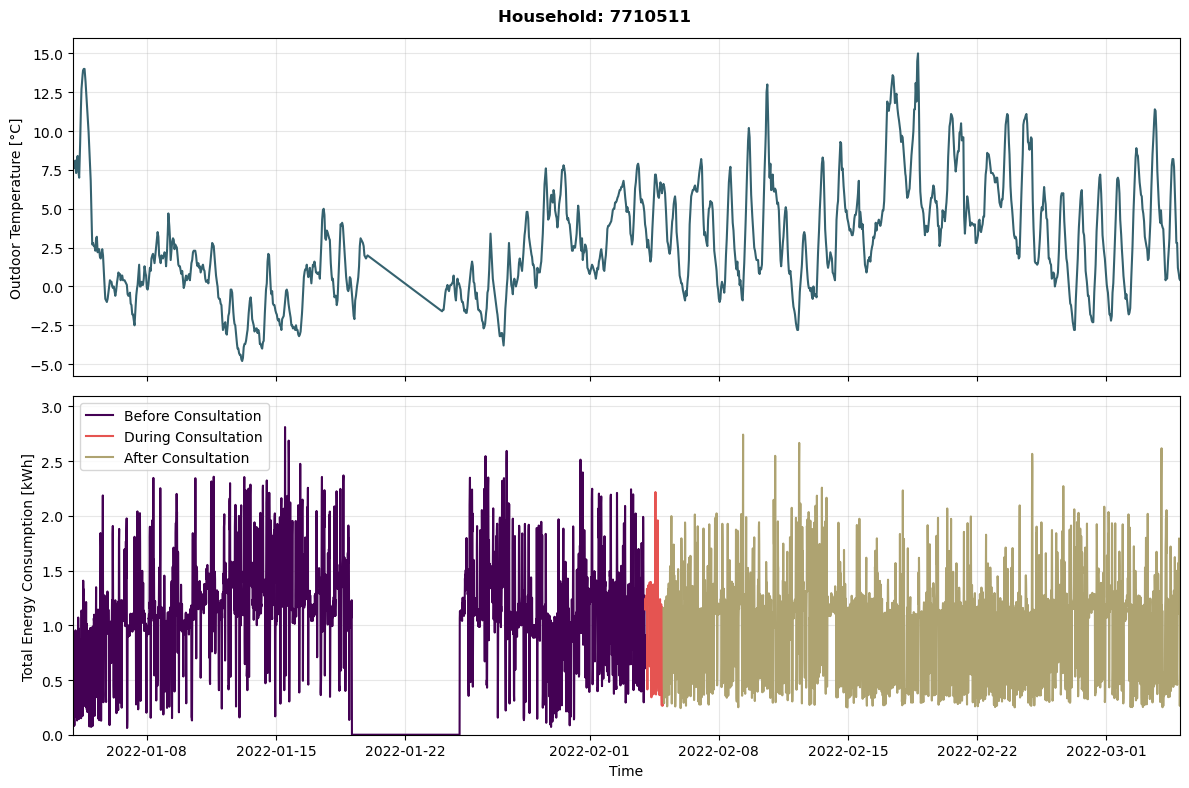

,Household_ID,Group,AffectsTimePoint,Timestamp,kWh_received_Total,kWh_received_HeatPump,kWh_received_Other,Temperature_avg_hourly,Temperature_max_daily,Temperature_min_daily,...,Spring,Summer,Autumn,TransitionPeriod,Cyclic_TimeOfDay_X,Cyclic_TimeOfDay_Y,Cyclic_DayOfYear_X,Cyclic_DayOfYear_Y,Cyclic_DayOfWeek_X,Cyclic_DayOfWeek_Y
43968,7710511,treatment,before visit,2022-01-04 00:00:00+00:00,0.251,NaN,NaN,7.700,14.5,3.9,...,False,False,False,False,0.000000,1.000000,0.068802,0.997630,0.781831,0.623490
43969,7710511,treatment,before visit,2022-01-04 00:15:00+00:00,0.851,NaN,NaN,7.675,14.5,3.9,...,False,False,False,False,0.065403,0.997859,0.068802,0.997630,0.781831,0.623490
43970,7710511,treatment,before visit,2022-01-04 00:30:00+00:00,0.078,NaN,NaN,7.650,14.5,3.9,...,False,False,False,False,0.130526,0.991445,0.068802,0.997630,0.781831,0.623490
43971,7710511,treatment,before visit,2022-01-04 00:45:00+00:00,0.577,NaN,NaN,7.625,14.5,3.9,...,False,False,False,False,0.195090,0.980785,0.068802,0.997630,0.781831,0.623490
43972,7710511,treatment,before visit,2022-01-04 01:00:00+00:00,0.388,NaN,NaN,7.600,14.5,3.9,...,False,False,False,False,0.258819,0.965926,0.068802,0.997630,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49339,7710511,treatment,after visit,2022-03-04 22:45:00+00:00,1.623,NaN,NaN,0.600,8.7,0.0,...,True,False,False,True,-0.321439,0.946930,0.884068,0.467359,-0.433884,-0.900969
49340,7710511,treatment,after visit,2022-03-04 23:00:00+00:00,1.694,NaN,NaN,0.500,8.7,0.0,...,True,False,False,True,-0.258819,0.965926,0.884068,0.467359,-0.433884,-0.900969
49341,7710511,treatment,after visit,2022-03-04 23:15:00+00:00,0.988,NaN,NaN,0.475,8.7,0.0,...,True,False,False,True,-0.195090,0.980785,0.884068,0.467359,-0.433884,-0.900969
49342,7710511,treatment,after visit,2022-03-04 23:30:00+00:00,0.264,NaN,NaN,0.450,8.7,0.0,...,True,False,False,True,-0.130526,0.991445,0.884068,0.467359,-0.433884,-0.900969


In [3]:
# --------------------------------
# EXAMPLE: LOAD DATA
# --------------------------------

# select household ID 
household_id = 7710511

# load data individually 
df_smd = heapo.load_smart_meter_data(household_id, resolution='15min')
df_weather = heapo.load_weather_data(household_id, resolution='hourly_and_daily')
df_protocol = heapo.load_protocol_data(household_id)

# load smart meter data of multiple households at once 
df_multiple = heapo.load_smart_meter_data_multiple([7710511, 105807], resolution='15min')

# load combined weather and smart meter data and add temporal context 
df = heapo.load_smart_meter_and_weather_data_combined(household_id, smd_resolution='15min', weather_resolution='hourly_and_daily', interpolate_hourly=True)
df = heapo.add_temporal_information(df, inplace=True)

# limit time series around report date 
report_date = df_protocol['Visit_Date'].iloc[0]
df = heapo.limit_time_series_around_date(df, report_date, months_before=1, months_after=1, inplace=True)

# split into before and after report date
df_before, df_during, df_after = heapo.split_time_series_around_consultation(df)

# --------------------------------
# EXAMPLE: PLOT ENERGY CONSUMPTION
# --------------------------------

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Household: {}'.format(household_id), fontweight='bold')

# plot temperature 
ax = axes[0]
ax.plot(df['Timestamp'].values, df['Temperature_avg_hourly'].values, color=COLOR_DARK)
ax.set_ylabel('Outdoor Temperature [°C]')
ax.grid(alpha=0.3)

# plot energy consumption
ax = axes[1]
if len(df_before) > 0:
    ax.plot(df_before['Timestamp'].values, df_before['kWh_received_Total'].values, color=COLOR_PURPLE, label='Before Consultation')
if len(df_during) > 0:
    ax.plot(df_during['Timestamp'].values, df_during['kWh_received_Total'].values, color=COLOR_RED, label='During Consultation')
if len(df_after) > 0:
    ax.plot(df_after['Timestamp'].values, df_after['kWh_received_Total'].values, color=COLOR_YELLOW, label='After Consultation')
ax.set_xlabel('Time')
ax.set_ylabel('Total Energy Consumption [kWh]')
ax.set_xlim(df_before['Timestamp'].min(), df_after['Timestamp'].max())
ax.set_ylim(0, df['kWh_received_Total'].max() * 1.1)
ax.legend()
ax.grid(alpha=0.3)

fig.tight_layout()
plt.show()

display(df)

### Example: Selecting Households, Preparing Features, and Ground Truth Data  

This example outlines a potential data preparation workflow for training and evaluating models to learn treatment effects. The following cell generates static metadata as features and ground truth labels based on selected settings and energy consultant evaluations for the chosen households. Since protocol data is only available for the treatment group, households in the control group cannot be used for this step.

1. **Select relevant households** with suitable 15-minute smart meter data.  
2. **Prepare feature sets** describing the building, heat pump, and heating system characteristics that remain constant over time.  
3. **Prepare ground truth data**, distinguishing between pre- and post-consultation phases (e.g., evaluations by energy consultants and heat pump configuration labels).

In [4]:
# ------------------------------
# SELECT RELEVANT HOUSEHOLDS 
# ------------------------------

# select households with appropriate data
df_meta = heapo.get_meta_data_overview()
df_overview = heapo.get_smart_meter_data_overview()
df_overview = pd.merge(df_overview, df_meta[['Household_ID', 'Group', 'Protocols_HasMultipleVisits']], on='Household_ID', how='left')
df_overview = df_overview[df_overview['Group'] == 'treatment'] # only households in treatment group
df_overview = df_overview[df_overview['Protocols_HasMultipleVisits']==False] # only households with one visit 
df_overview = df_overview[df_overview['SMD_15min_MeasurementsAvailable_Total']==True] # only households with total measurements 

# add report date 
df_overview = pd.merge(df_overview, heapo.get_all_protocols()[['Household_ID', 'Visit_Date']], on='Household_ID', how='left')
df_overview.dropna(subset=['Visit_Date'], inplace=True) # only use households where report date is known

# only use households where the measurements start latest 3 months after the report or end latest 3 months before report 
months = 3
df_overview = df_overview[df_overview['SMD_15min_TimeAvailable_EarliestTimestamp'].dt.date <= df_overview['Visit_Date'] + relativedelta(months=months)] 
df_overview = df_overview[df_overview['SMD_15min_TimeAvailable_LatestTimestamp'].dt.date >= df_overview['Visit_Date'] - relativedelta(months=months)] 

# drop households with EV or PV
# df_overview = df_overview[df_overview['Installation_HasPVSystem']!=True] # exclude households known to have a PV system 
# df_overview = df_overview[df_overview['Installation_HasElectricVehicle']!=True] # exclude households known to have an electric vehicle

# ------------------------------
# PREPARE FEATURES 
# ------------------------------

# get the contextual information derived from all protocols 
df_features = heapo.prepare_features_from_protocols()

# select only the ones referring to the selected household
df_features = df_features[df_features['Household_ID'].isin(df_overview['Household_ID'].values)]
df_features['Household_ID'] = df_features['Household_ID'].astype(int)

# check for missing values
nan_cols = df_features.columns[df_features.isna().any()].tolist()
print('Columns with missing values in features:', nan_cols)

# ------------------------------
# PREPARE GROUND TRUTH
# ------------------------------

df_ground_truth = heapo.prepare_groundtruth_from_protocols()
df_ground_truth = df_ground_truth[df_ground_truth['Household_ID'].isin(df_overview['Household_ID'].values)]
df_ground_truth['Household_ID'] = df_ground_truth['Household_ID'].astype(int)

# check for missing values
nan_cols = df_ground_truth.columns[df_ground_truth.isna().any()].tolist()
print('Columns with missing values in groundtruth:', nan_cols)

# ------------------------------
# EXPORT DATA
# ------------------------------
# export_folder = data_path + 'selected_households/'
export_folder = os.path.dirname(os.getcwd()) + '/data/selected_households/'
mkdir(export_folder)
df_features.to_csv(export_folder + 'features.csv', index=False, sep=';')
df_ground_truth.to_csv(export_folder + 'ground_truth.csv', index=False, sep=';')

print('\n'+'*'*80+'\nFeatures Data Frame:\n'+'*'*80)
display(df_features)
print('\n'+'*'*80+'\nGround Truth Data Frame:\n'+'*'*80)
display(df_ground_truth)

Columns with missing values in features: ['Building_ConstructionYear_Interval', 'HeatPump_Installation_HeatingCapacity']
Columns with missing values in groundtruth: ['HeatPump_BasicFunctionsOkay', 'HeatPump_TechnicallyOkay', 'HeatPump_ElectricityConsumption_TooHigh', 'HeatPump_ElectricityConsumption_Categorization', 'HeatPump_HeatingLimitSetting', 'HeatPump_NightSetbackSetting_Activated', 'DHW_TemperatureSetting_Categorization']

********************************************************************************
Features Data Frame:
********************************************************************************


,Household_ID,Visit_Year,Visit_Date,Building_Type,Building_HousingUnits,Building_ConstructionYear_Interval,Building_Renovated,Building_FloorAreaHeated_Total,Building_Residents,Building_PVSystem_Available,...,HeatDistribution_System_FloorHeating,HeatDistribution_System_ThermostaticValve,DHW_Production_ByHeatPump,DHW_Production_ByElectricWaterHeater,DHW_Production_BySolar,DHW_Production_ByHeatPumpBoiler,DHW_Circulation_ByTraceHeating,DHW_Circulation_ByCirculationPump,DHW_Circulation_SwitchedByTimer,DHW_Sterilization_Available
18,1137376,2019,2019-05-28,1.0,1.0,3.0,0.0,200.0,5.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25,9880798,2020,2020-02-17,1.0,1.0,5.0,0.0,150.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26,680861,2020,2020-02-17,1.0,1.0,5.0,0.0,400.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
27,468185,2020,2020-02-25,1.0,1.0,2.0,1.0,300.0,2.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28,674801,2020,2020-02-28,1.0,1.0,6.0,0.0,150.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,876790,2024,2024-02-15,1.0,1.0,7.0,0.0,180.0,3.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207,1015877,2024,2024-02-20,1.0,1.0,1.0,1.0,170.0,2.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
208,8280779,2024,2024-02-20,1.0,1.0,1.0,1.0,175.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
209,970979,2024,2024-02-20,1.0,1.0,1.0,1.0,165.0,3.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



********************************************************************************
Ground Truth Data Frame:
********************************************************************************


,Household_ID,AffectsTimePoint,HeatPump_BasicFunctionsOkay,HeatPump_TechnicallyOkay,HeatPump_Installation_CorrectlyPlanned,HeatPump_Installation_CorrectlyPlanned_Categorization,HeatPump_ElectricityConsumption_TooHigh,HeatPump_ElectricityConsumption_Categorization,HeatPump_HeatingCurveSetting_TooHigh,HeatPump_HeatingLimitSetting_TooHigh,HeatPump_HeatingLimitSetting,HeatPump_NightSetbackSetting_Activated,DHW_TemperatureSetting_TooHigh,DHW_TemperatureSetting_Categorization
0,9981041,before visit,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,18.0,0.0,0.0,1.0
1,9981041,after visit,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,17.0,0.0,0.0,1.0
2,9889190,before visit,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0,0.0,1.0
3,9889190,after visit,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,16.0,0.0,0.0,1.0
4,9889114,before visit,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,100120,after visit,NaN,NaN,0.0,3.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0
416,100119,before visit,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,NaN
417,100119,after visit,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,0.0,NaN
418,86109,before visit,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1.0


### Example: Plot Smart Meter Data as Heat Map

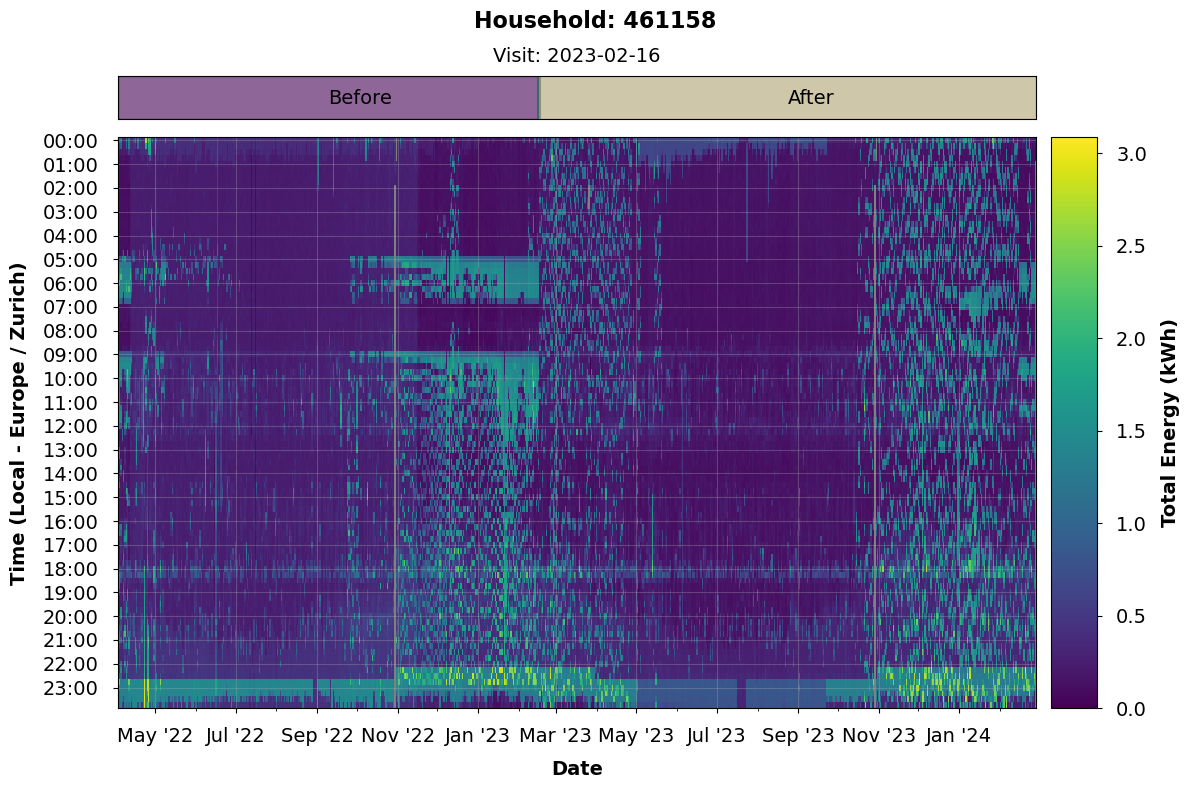

In [5]:
# create HEAPO object
heapo = HEAPO(data_path=data_path, use_local_time=True, suppress_warning=False)

# select household ID 
household_id = 461158 # Other examples to test: 100119, 111710, 7710511, 105807

# load data 
df_smd = heapo.load_smart_meter_data(household_id, resolution='15min')

# basic settings 
fontsize = 14

# create figure with for heatmap, colorbar and line plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios':[0.3, 4], 'width_ratios':[1, 0.05]})

# get relevant axes 
ax_consultation_range = axes[0, 0]
ax_heatmap = axes[1, 0]
ax_cbar = axes[1, 1]

# hide axis on the top right 
axes[0, 1].set_visible(False)

# plot heatmap 
d = heapo.plot_heatmap(df_smd, 'kWh_received_Total', ax=ax_heatmap, hour_interval=1, cmap='viridis', vmin=None, vmax=None, fontsize=fontsize)

# plot color bar
cbar = heapo.plot_cbar_on_ax(d['mesh'], cax=ax_cbar, fontsize=fontsize, cbarlabel='Total Energy (kWh)')

# plot consultation range
report_date = heapo.load_protocol_data(household_id)['Visit_Date'].values[0]
heapo.plot_consultation_range_on_ax(ax_consultation_range, df_smd, report_date, fontsize=fontsize, annotate_before_after=True, color_before=COLOR_PURPLE, color_after=COLOR_YELLOW, color_during=COLOR_DARK)
ax_consultation_range.set_title('Visit: {}'.format(report_date), fontsize=fontsize, pad=10)

# set title of figure
fig.suptitle('Household: {}'.format(household_id), fontsize=fontsize+2, fontweight='bold')

# show figure 
fig.subplots_adjust(top=1.2)
fig.tight_layout()
plt.show()


### Example: Change Resolution of Data

,Household_ID,Group,AffectsTimePoint,Timestamp,kWh_received_Total,kWh_received_HeatPump,kWh_received_Other,Temperature_avg_hourly,Temperature_max_daily,Temperature_min_daily,...,Humidity_avg_hourly,Humidity_avg_daily,Precipitation_total_hourly,Precipitation_total_daily,Pressure_BarometricHeight_avg_hourly,Pressure_SeaLevelStandardAtmosphere_avg_hourly,Pressure_SeaLevel_avg_hourly,Sunshine_duration_hourly,Sunshine_duration_daily,WindSpeed_hourly
0,105807,treatment,before visit,2020-10-01 00:00:00+00:00,0.105,NaN,NaN,8.400,18.2,7.4,...,98.4,84.9,0.0,0.2,962.2,1012.5,1013.1,0.0,2.0,0.60
1,105807,treatment,before visit,2020-10-01 00:15:00+00:00,0.083,NaN,NaN,8.375,18.2,7.4,...,98.4,84.9,0.0,0.2,962.1,1012.4,1013.0,0.0,2.0,0.65
2,105807,treatment,before visit,2020-10-01 00:30:00+00:00,0.094,NaN,NaN,8.350,18.2,7.4,...,98.4,84.9,0.0,0.2,962.0,1012.3,1012.9,0.0,2.0,0.70
3,105807,treatment,before visit,2020-10-01 00:45:00+00:00,0.086,NaN,NaN,8.325,18.2,7.4,...,98.4,84.9,0.0,0.2,961.9,1012.2,1012.8,0.0,2.0,0.75
4,105807,treatment,before visit,2020-10-01 01:00:00+00:00,0.091,NaN,NaN,8.300,18.2,7.4,...,98.4,84.9,0.0,0.2,961.8,1012.1,1012.7,0.0,2.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119131,105807,treatment,after visit,2024-02-27 22:45:00+00:00,1.574,NaN,NaN,7.775,10.0,3.2,...,77.6,72.9,0.0,0.0,964.7,1015.1,1015.8,0.0,0.7,2.60
119132,105807,treatment,after visit,2024-02-27 23:00:00+00:00,0.692,NaN,NaN,7.800,10.0,3.2,...,78.1,72.9,0.0,0.0,964.8,1015.2,1015.9,0.0,0.7,2.70
119133,105807,treatment,after visit,2024-02-27 23:15:00+00:00,0.105,NaN,NaN,NaN,10.0,3.2,...,NaN,72.9,NaN,0.0,NaN,NaN,NaN,NaN,0.7,NaN
119134,105807,treatment,after visit,2024-02-27 23:30:00+00:00,0.102,NaN,NaN,NaN,10.0,3.2,...,NaN,72.9,NaN,0.0,NaN,NaN,NaN,NaN,0.7,NaN


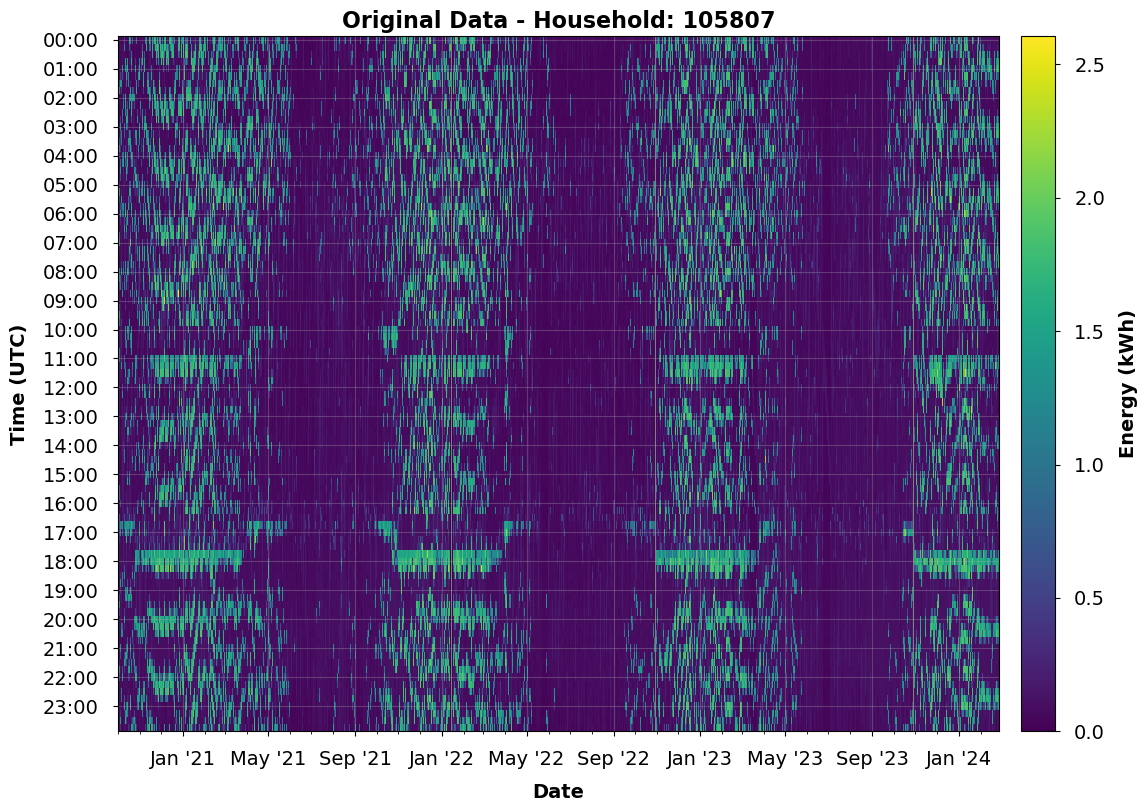

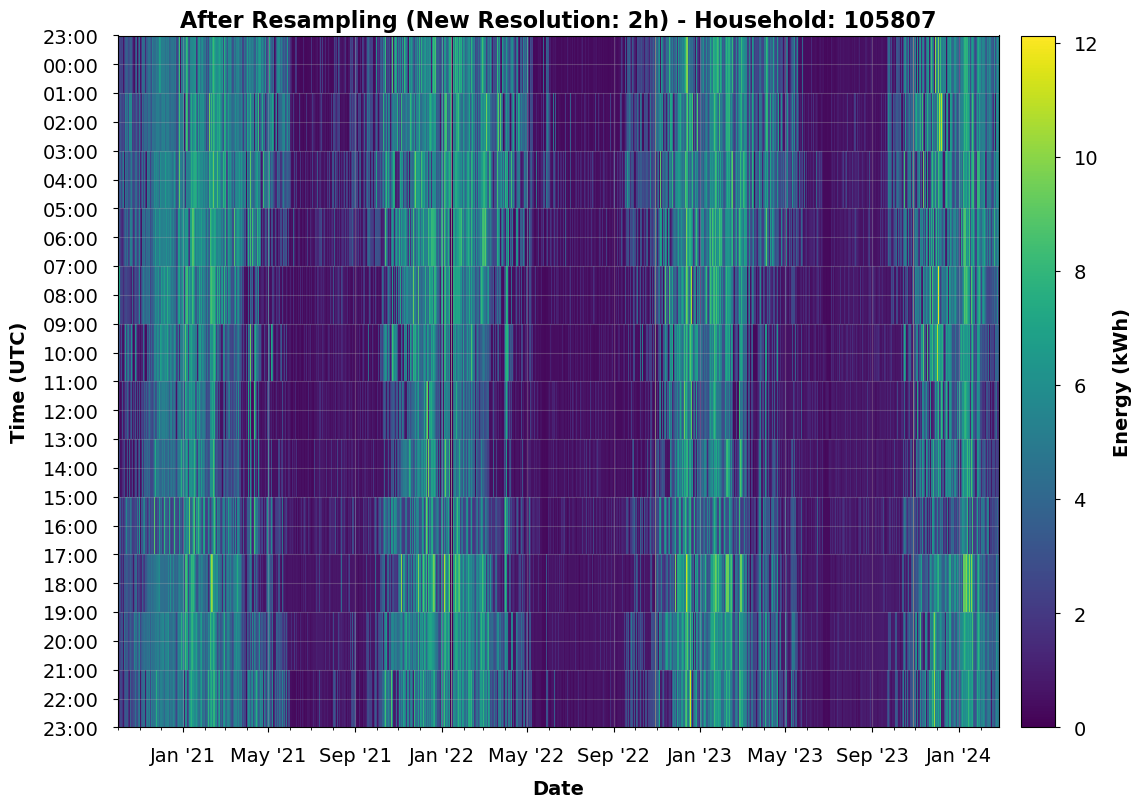

In [6]:
# create HEAPO object
heapo = HEAPO(data_path=data_path, use_local_time=False, suppress_warning=False)

# select household ID 
household_id = 105807

# ------------------------------
# LOAD AND ADJUST DATA 
# ------------------------------

# load data - NOTE: also works when using combined data frame that include weather data and smart meter data 
df_smd = heapo.load_smart_meter_and_weather_data_combined(household_id, smd_resolution='15min', weather_resolution='hourly_and_daily', interpolate_hourly=True)
display(df_smd)

# change resolution 
resolution = '2h'
df_new = heapo.change_resolution(df_smd, resolution, add_missing_dates=False, inplace=False)

# ------------------------------
# SHOW HEAT MAPS 
# ------------------------------

# column to show 
col = 'kWh_received_Total'
# col = 'Sunshine_duration_hourly'
# col = 'Temperature_avg_hourly'

# heatmap of original data
d = heapo.plot_heatmap(df_smd, col,hour_interval=1, cmap='viridis', cbar=True, fontsize=14)
d['ax'].set_title('Original Data - Household: {}'.format(household_id), fontweight='bold', fontsize=16)
plt.show()

# heatmap of resampled data 
d = heapo.plot_heatmap(df_new, col,hour_interval=1, cmap='viridis', cbar=True, fontsize=14)
d['ax'].set_title('After Resampling (New Resolution: {}) - Household: {}'.format(resolution, household_id), fontweight='bold', fontsize=16)
plt.show()


### Other Examples

In [7]:
# you can get the description of a variable as follows: 
print(heapo.explain_variable('Survey_Building_Type'))

# you can get all households of a specific group as follows:
print('Treatment Group:', len(heapo.get_all_households(group='treatment')))
print('Control Group:', len(heapo.get_all_households(group='control')))

{'VariableName': 'Survey_Building_Type', 'Description': 'type of building (house, appartment) - as declared by household in online tool'}
Treatment Group: 214
Control Group: 1194
